In [29]:
from typing import TypedDict,List
from langgraph.graph import StateGraph, START,END

class AgentState(TypedDict):
    number1 : int
    number2: int
    number3:int
    number4:int
    operation :str
    operation1:str
    result:int
    result1:int


def addition(state:AgentState)->AgentState:
    """Adds 2 numbers"""
    state["result"]=state["number1"]+state["number2"]
    return state

def subtraction(state:AgentState)->AgentState:
    """Adds 2 numbers"""
    state["result"]=state["number1"]-state["number2"]
    return state

def choose_nextNode(state:AgentState)->AgentState:
    """Select the next node of the graph"""
    if state["operation"] == "+":
        return "add"
    else:
        return "sub"

def addition1(state:AgentState)->AgentState:
    """Adds 2 numbers"""
    state["result1"]=state["number3"]+state["number4"]
    return state

def subtraction1(state:AgentState)->AgentState:
    """Adds 2 numbers"""
    state["result1"]=state["number3"]-state["number4"]
    return state

def choose_nextNode1(state:AgentState)->AgentState:
    """Select the next node of the graph"""
    if state["operation1"] == "+":
        return "add"
    else:
        return "sub"
    
graph=StateGraph(AgentState)
graph.add_node("adder",addition)
graph.add_node("subrator",subtraction)
graph.add_node("adder1",addition1)
graph.add_node("subrator1",subtraction1)
graph.add_node("router",lambda state:state)
graph.add_node("router1",lambda state:state)
graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    choose_nextNode,
    {
        "add":"adder",
        "sub":"subrator"
    }
    )
graph.add_edge("adder","router1")
graph.add_edge("subrator","router1")
graph.add_conditional_edges(
    "router1",
    choose_nextNode1,
    {
        "add":"adder1",
        "sub":"subrator1"
    }
    )
graph.add_edge("adder1",END)
graph.add_edge("subrator1",END)
app=graph.compile()


In [30]:
initial_State=AgentState(number1=10, number2=5,operation="-",number3=35,number4=4,operation1="+")
print(app.invoke(initial_State))

{'number1': 10, 'number2': 5, 'number3': 35, 'number4': 4, 'operation': '-', 'operation1': '+', 'result': 5, 'result1': 39}


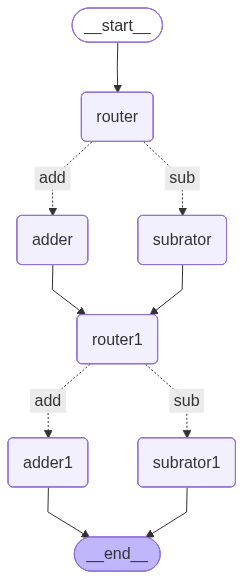

In [26]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))